Задание 1: Анализ корреляции между ВВП на душу населения и оценкой счастья.
Используйте коэффициент Пирсона для определения взаимосвязи между ВВП на душу населения и оценками счастья.

Задание 2: Исследование влияния социальной поддержки на оценку счастья.
Примените коэффициент Спирмена для анализа отношений между социальной поддержкой и оценками счастья.

Задание 3: Взаимосвязь между продолжительностью здоровой жизни и оценками счастья.
Используйте коэффициент корреляции Кэнделла для изучения связи между ожидаемой продолжительностью здоровой жизни и уровнем счастья.

Задание 4: Свобода делать жизненный выбор и уровень счастья.
Проанализируйте, используя коэффициент корреляции Пирсона, как свобода делать жизненный выбор влияет на уровень счастья.

Вопросы для обсуждения:
Какой из факторов наиболее сильно связан с уровнем счастья в анализируемых странах? В чем может заключаться причина такой взаимосвязи?

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

In [3]:
df = pd.read_csv('world_happiness_report_2019.csv')
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [5]:
df.columns

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [6]:
numeric_features = ['Overall rank', 'Score', 'GDP per capita', 'Social support', 'Healthy life expectancy','Freedom to make life choices', 'Generosity', 'Perceptions of corruption']
df_num = df[numeric_features]
df_num.head()



,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [21]:
df.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


In [8]:
df.describe(include='object')

,Country or region
count,156
unique,156
top,Finland
freq,1


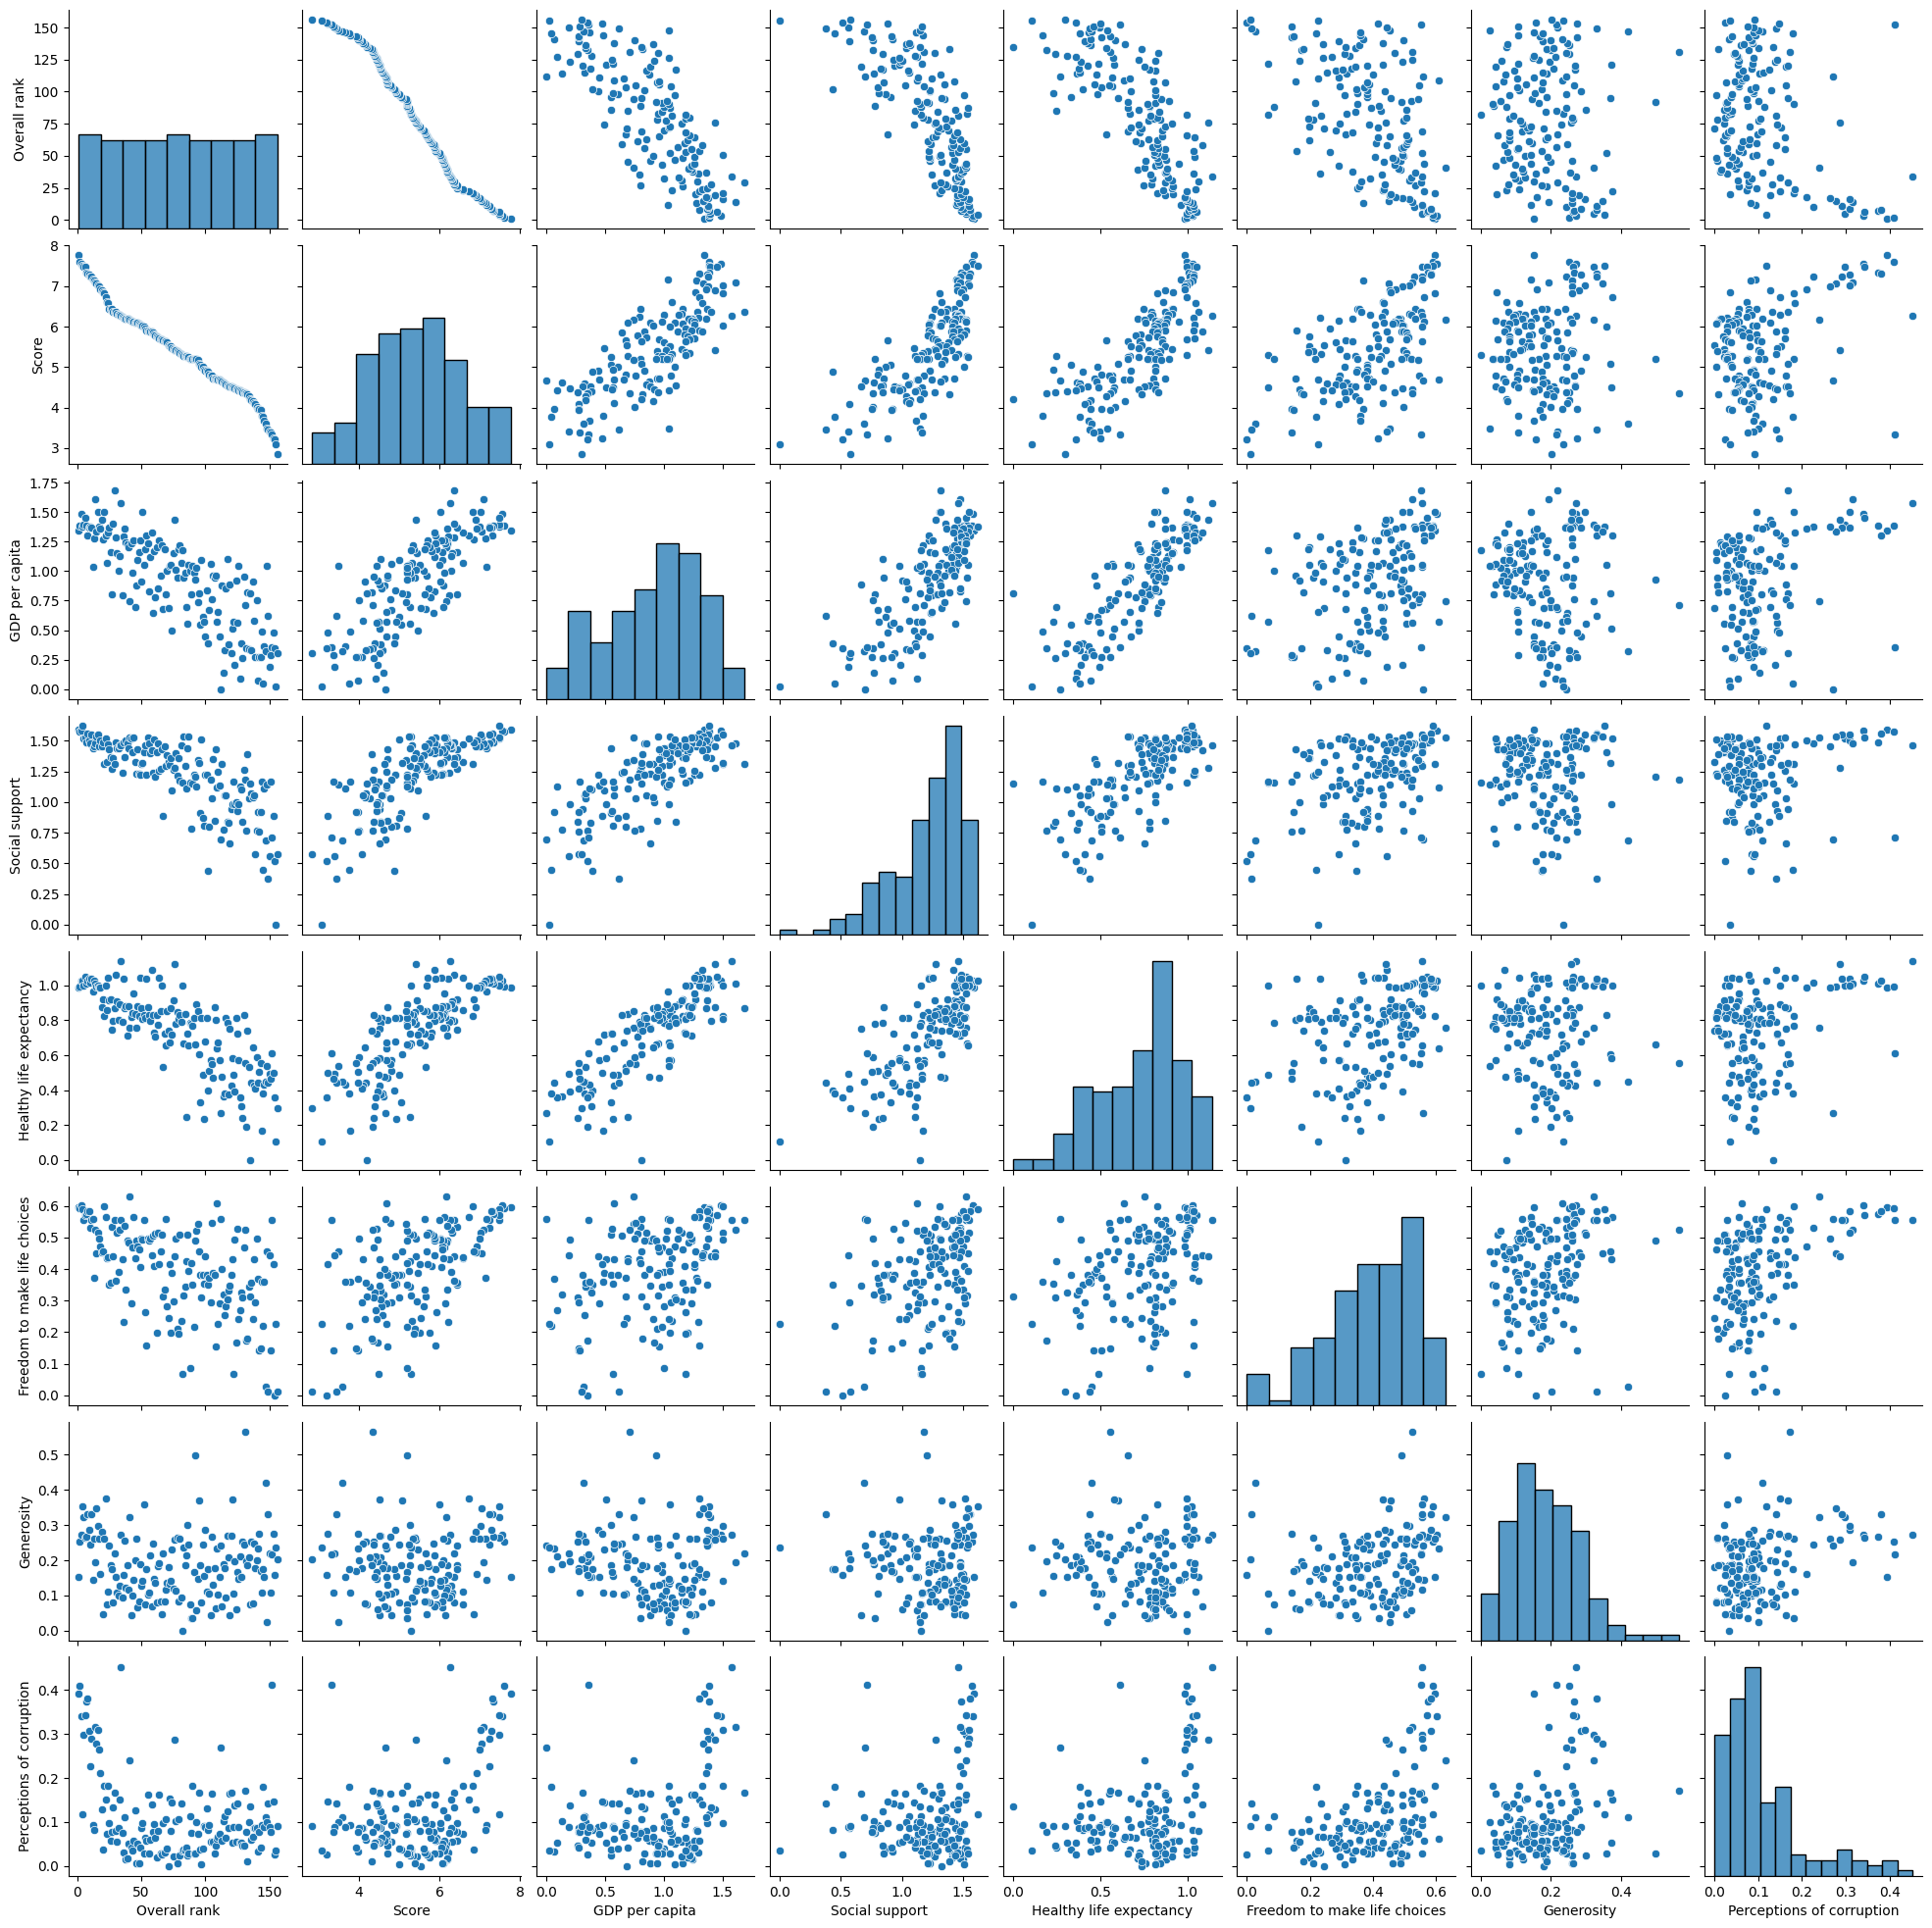

In [9]:
sns.pairplot(df)

<Axes: xlabel='Generosity', ylabel='Count'>

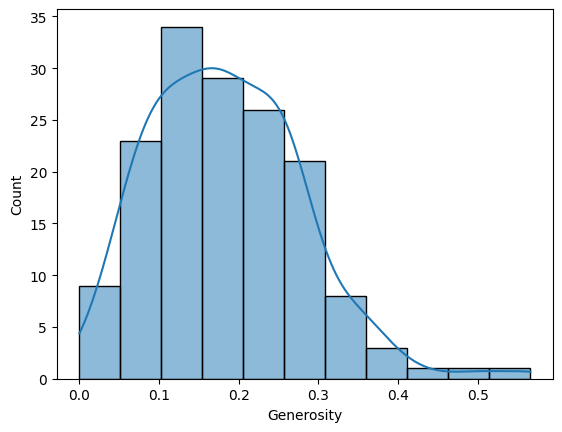

In [29]:
sns.histplot(df['Generosity'], kde=True)

<Axes: xlabel='Score', ylabel='Density'>

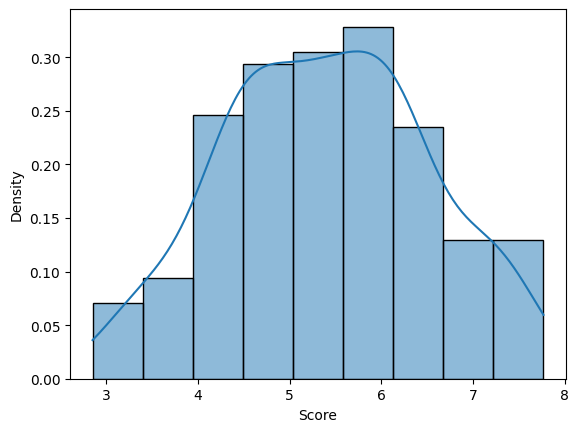

In [28]:
sns.histplot(df['Score'], kde=True, stat="density")

### Задание 1: Анализ корреляции между ВВП на душу населения и оценкой счастья.
- Используйте коэффициент Пирсона для определения взаимосвязи между ВВП на душу населения и оценками счастья.

In [10]:
df.columns

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [11]:
import scipy.stats as stats
# Вычисляем коэффициент корреляции Пирсона (линейная связь)
correlation_coefficient, p_value = stats.pearsonr(df['GDP per capita'], df['Social support'])

print(f"Коэффициент корреляции Пирсона: {correlation_coefficient}")
print(f"P-значение: {p_value}")

Коэффициент корреляции Пирсона: 0.7549057272454567
P-значение: 5.172502862449859e-30


Коэффициент корреляции Пирсона равен 0.79, и это означает, что между уровнем ВВП на душу населения и оценками счастья есть положительная связь, и она довольно сильная.

P-значение равное 4.3e-35 говорит о статистической значимости результатов. Поскольку это значение меньше стандартного порога в 0.05 для статистической значимости, мы можем сказать, что существует статистически значимая корреляция между уровнем ВВП на душу населения и оценками счастья.


### Задание 2: Исследование влияния социальной поддержки на оценку счастья.
- Примените коэффициент Спирмена для анализа отношений между социальной поддержкой и оценками счастья.


In [12]:
from scipy.stats import spearmanr

# Коэффициент корреляции Спирмена (монотонные - нелинейные -категориальные)
coef, p = spearmanr(df['Social support'], df['Score'])
print(f"Коэффициент корреляции Спирмена: {coef}, P-value: {p}")


Коэффициент корреляции Спирмена: 0.8161807357057258, P-value: 1.613098226311642e-38


Коэффициент корреляции Спирмена равен 0.82, и это означает, что между социальной поддержкой и оценками счастья есть положительная связь, и она довольно сильная.

P-значение равное 1.6e-38 говорит о статистической значимости результатов

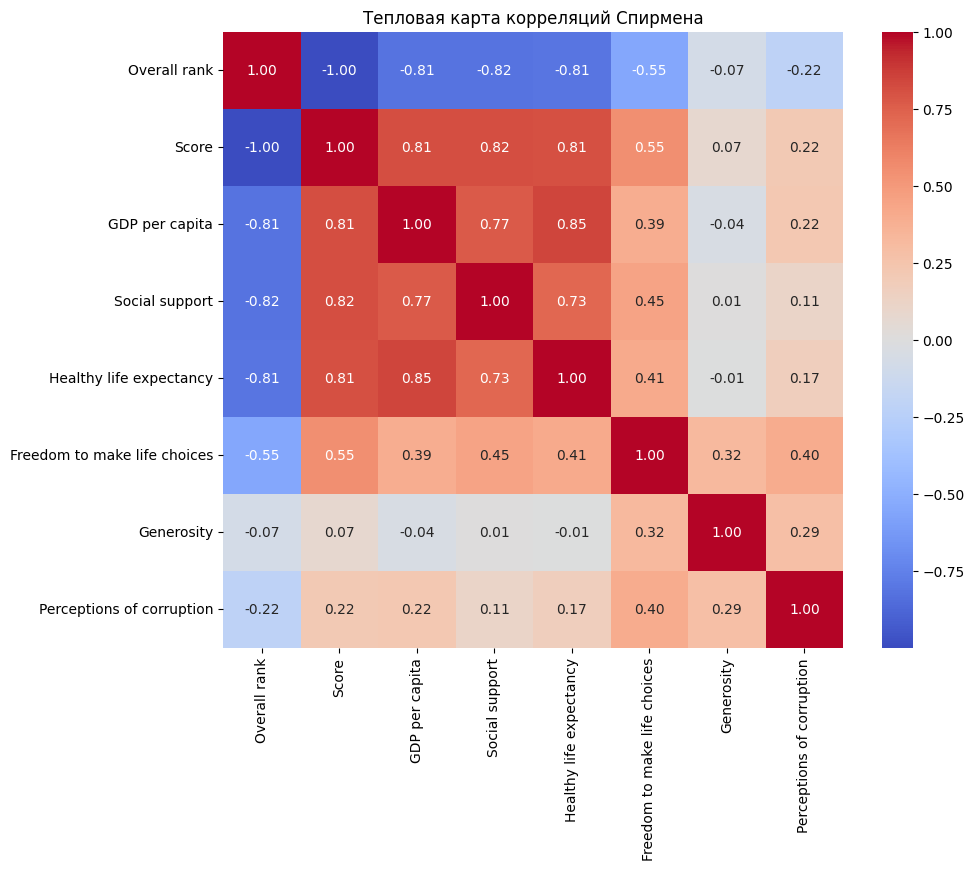

In [13]:
# Выборка количественных переменных
correlation_matrix = df_num.corr(method='spearman')  # Вычисляем матрицу корреляций Спирмена

# Тепловая карта корреляций
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Тепловая карта корреляций Спирмена')
plt.show()


### Задание 3: Взаимосвязь между продолжительностью здоровой жизни и оценками счастья.
- Используйте коэффициент корреляции Кэнделла для изучения связи между ожидаемой продолжительностью здоровой жизни и уровнем счастья.


Коэффициент корреляции Кэнделла: 0.6026128531700047, P-value: 8.000780684230196e-29


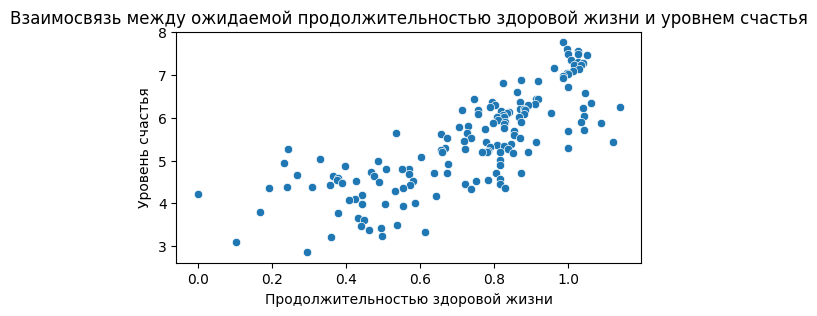

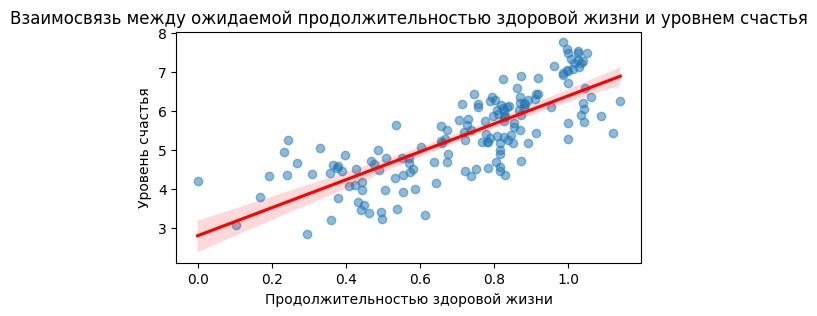

In [14]:
from scipy.stats import kendalltau


# Расчет коэффициента Кэнделла (ранг переменных, порядковые переменные)
tau, p_value = kendalltau(df['Healthy life expectancy'], df['Score'])
print(f"Коэффициент корреляции Кэнделла: {tau}, P-value: {p_value}")

# Визуализация
plt.figure(figsize=(6, 3))
sns.scatterplot(x='Healthy life expectancy', y='Score', data=df)
plt.title('Взаимосвязь между ожидаемой продолжительностью здоровой жизни и уровнем счастья')
plt.xlabel('Продолжительностью здоровой жизни')
plt.ylabel('Уровень счастья')
plt.show()

# Визуализация с линией тренда 
plt.figure(figsize=(6, 3))
sns.regplot(x='Healthy life expectancy', y='Score', data=df, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.title('Взаимосвязь между ожидаемой продолжительностью здоровой жизни и уровнем счастья')
plt.xlabel('Продолжительностью здоровой жизни')
plt.ylabel('Уровень счастья')
plt.show()


Исходя из полученного значения коэффициента корреляции Кэнделла (0.6) и крайне низкого p-value (8е-29), мы можем сделать вывод о наличии статистически значимой положительной монотонной взаимосвязи между ожидаемой продолжительностью здоровой жизни и уровнем счастья. Это означает, что с увеличением ожидаемой продолжительности здоровой жизни растет и уровень счастья.



### Задание 4: Свобода делать жизненный выбор и уровень счастья.
- Проанализируйте, используя коэффициент корреляции Пирсона, как свобода делать жизненный выбор влияет на уровень счастья.


In [15]:
import scipy.stats as stats
# Вычисляем коэффициент корреляции Пирсона (линейная связь)
correlation_coefficient, p_value = stats.pearsonr(df['Freedom to make life choices'], df['Score'])
print(f"Коэффициент корреляции Пирсона: {correlation_coefficient}")
print(f"P-значение: {p_value}")

Коэффициент корреляции Пирсона: 0.5667418257199901
P-значение: 1.2379243627982116e-14


Коэффициент корреляции Пирсона равен 0.57, и это означает, что между уровнем ВВП на душу населения и оценками счастья есть положительная связь.

P-значение равное 1.2e-14 говорит о статистической значимости результатов. Поскольку это значение меньше стандартного порога в 0.05 для статистической значимости, мы можем сказать, что существует статистически значимая корреляция между уровнем ВВП на душу населения и оценками счастья.


### Вопросы для обсуждения:
1. Какой из факторов наиболее сильно связан с уровнем счастья в анализируемых странах? В чем может заключаться причина такой взаимосвязи?


Согласно тепловой матрице корреляций Спирмена наибольшее влияние на уровень счастья ('Score') связан с наличием социальной поддержки ('Social support')
следом за этим фактором, идут ожидаемая продолжительность жизни, и уровень ввп. 
В то же время корреляция между уровнем ВВП, социальной поддержкой и ожидаемым уровнем жизни также очень высока.

Из любопытного: корреляция (Пирсон) Восприятия коррупции и Уровня счастья на уровне 40%, но при этом корреляция Восприятия коррупции с ВВП ниже -30%. Получается, что для счастья недостаточно высокого уровня ВВП, а нужен еще и высокий уровень восприятия коррупции?
А вот по Спирмену, корреляции между этими данными нет, так как коэффициент начимости больше 5%

In [16]:
import scipy.stats as stats
# Вычисляем коэффициент корреляции Пирсона (линейная связь)
correlation_coefficient, p_value = stats.pearsonr(df['GDP per capita'], df['Perceptions of corruption'])
print(f"Коэффициент корреляции Пирсона ВВП/Восприятие коррупции: {correlation_coefficient}")
print(f"P-значение: {p_value}")

Коэффициент корреляции Пирсона ВВП/Восприятие коррупции: 0.29891984568349284
P-значение: 0.00015033197857650671


In [17]:
from scipy.stats import spearmanr

# Коэффициент корреляции Спирмена (монотонные - нелинейные -категориальные)
coef, p = spearmanr(df['GDP per capita'], df['Perceptions of corruption'])
print(f"Коэффициент корреляции Спирмена: {coef}, P-value: {p}")


Коэффициент корреляции Спирмена: 0.22320255841749728, P-value: 0.005097584196204825


In [18]:
import scipy.stats as stats
# Вычисляем коэффициент корреляции Пирсона (линейная связь)
correlation_coefficient, p_value = stats.pearsonr(df['Score'], df['Perceptions of corruption'])
print(f"Коэффициент корреляции Пирсона Уровень счастья/Восприятие коррупции: {correlation_coefficient}")
print(f"P-значение: {p_value}")

Коэффициент корреляции Пирсона Уровень счастья/Восприятие коррупции: 0.3856130708664787
P-значение: 6.654010938470354e-07


In [19]:
from scipy.stats import spearmanr

# Коэффициент корреляции Спирмена (монотонные - нелинейные -категориальные)
coef, p = spearmanr(df['Score'], df['Perceptions of corruption'])
print(f"Коэффициент корреляции Спирмена: {coef}, P-value: {p}")


Коэффициент корреляции Спирмена: 0.2173484222491679, P-value: 0.006420238104986938
